In [4]:
!pip install opencv-python



In [23]:
import cv2
import numpy as np
import scipy.signal
# from scipy import signal
from tqdm import tqdm
#import imutils
from collections import deque
#from imutils.video import VideoStream
import argparse
from matplotlib import pyplot as plt
import cv2 as cv    
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage import io, img_as_float, img_as_ubyte, exposure
from os.path import isfile, join
import os.path, sys

import glob

import re

from ipywidgets import interact


# vid='cartpole_v1.mp4'
vid='1-s2.0-S2238785421001691-mmc3.mp4'

In [24]:
%matplotlib notebook

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

def autoscale(array, percentile):
    value = np.percentile(np.ndarray.flatten(array), percentile)
    return value

In [25]:
path='/home/parandakbari/Downloads/Frames'
img_directory= path + '/'

In [26]:
# Create a folder
frames = img_directory + 'Frames0/'

try:
    os.makedirs(frames)
except FileExistsError:
    pass

In [27]:
vidcap = cv2.VideoCapture('1-s2.0-S2238785421001691-mmc3.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite(frames+ '/'+ "frame"+str(count)+".JPG", image) 
    return hasFrames
sec = 0
frameRate = 0.05 #//it will capture image in each 0.5 second
count=1
success= getFrame(sec)

while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
    


In [28]:
# Read processed0 images to list DXR_images
images = []

for file in sorted(glob.glob(frames + '/*.JPG'), key=natural_keys):
    image = cv.imread(file, cv.IMREAD_GRAYSCALE)
    images.append(image)
images = np.array(images)

<ipython-input-28-61e79f51cde9>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array(images)


ValueError: could not broadcast input array from shape (216,832) into shape (216)

In [63]:
images[10].shape #y first then x

(216, 960)

In [64]:
print(len(images))

175


<IPython.core.display.Javascript object>


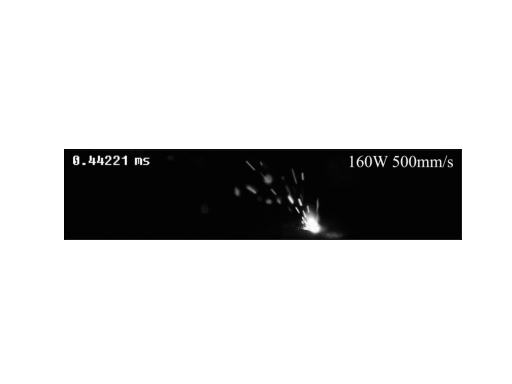

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [65]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(images[frame_num])
    im.set_clim(autoscale(images[frame_num], pixel_min1), autoscale(images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

## clipping, normalizing, equalization

In [66]:
clip_images = []
norm_images = []
equa_images = []

for jj in images:
    #1
    clip = np.clip(jj, np.percentile(jj, 1), np.percentile(jj, 99)) 
    #2
    norm = cv.normalize(clip, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype = cv.CV_8U)
#   #3_1
#   equa = rank.equalize(norm, selem=disk(30))
    '''
    This example enhances an image with low contrast, using a method called 
    local histogram equalization, 
    which spreads out the most frequent intensity values in an image.
    '''
    #3_2
    # create a CLAHE object (Arguments are optional).
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))
    cl1 = clahe.apply(norm)

    # Append
    norm_images.append(norm)
    equa_images.append(cl1)

<IPython.core.display.Javascript object>


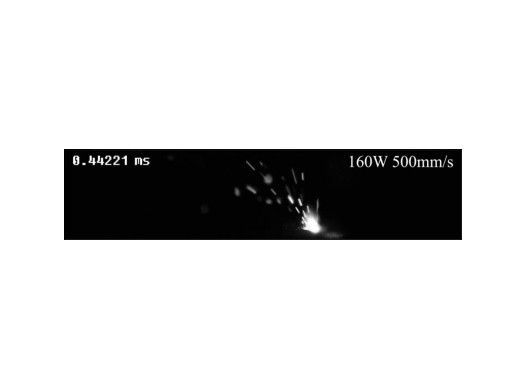

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [67]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(norm_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(norm_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(norm_images[frame_num])
    im.set_clim(autoscale(norm_images[frame_num], pixel_min1), autoscale(norm_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


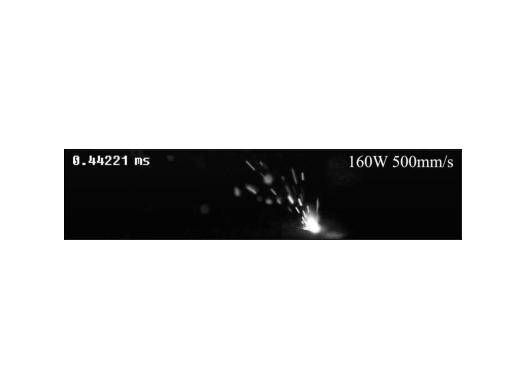

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [68]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(equa_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(equa_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(equa_images[frame_num])
    im.set_clim(autoscale(equa_images[frame_num], pixel_min1), autoscale(equa_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

## cropping

In [69]:
cropped_images= []
for jj in equa_images:
    jj = jj[41:216,:] 
    cropped_images.append(jj)

<IPython.core.display.Javascript object>


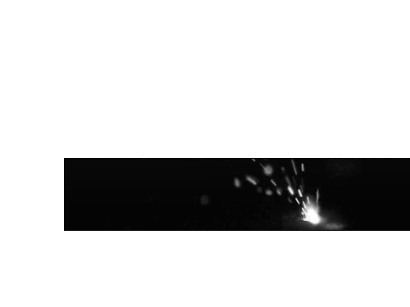

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [70]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(cropped_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(cropped_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(cropped_images[frame_num])
    im.set_clim(autoscale(cropped_images[frame_num], pixel_min1), autoscale(cropped_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


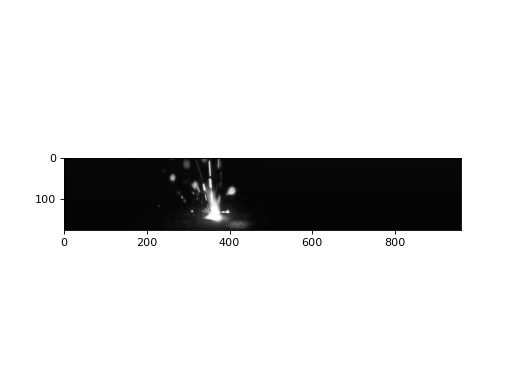

In [71]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(cropped_images[30], cmap='gray')

## masking

In [72]:
masked_images=[]
for i in cropped_images:
    
    mask= np.zeros(i.shape, dtype="uint8")
    cv2.rectangle(mask, (0,0), (960,130), 255, -1)
    masked= cv2.bitwise_and(i,i,mask=mask)
    masked_images.append(masked)
    #print(i.shape[:2])

<IPython.core.display.Javascript object>


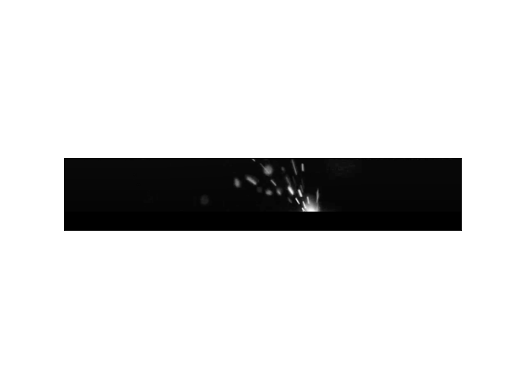

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [73]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(masked_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(masked_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(masked_images[frame_num])
    im.set_clim(autoscale(masked_images[frame_num], pixel_min1), autoscale(masked_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

## blurring

In [74]:
blur_images = []
for jj in masked_images:
    img = cv.medianBlur(jj,7) #9#5
    blur_images.append(img)

<IPython.core.display.Javascript object>


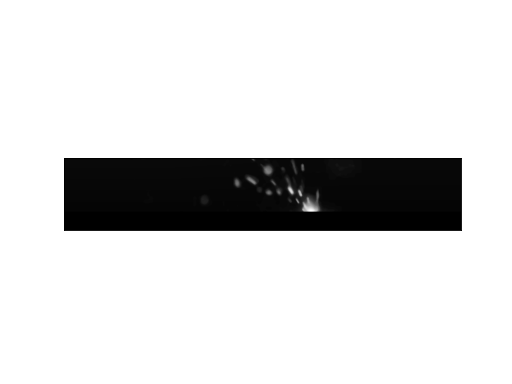

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [75]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(blur_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(blur_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(blur_images[frame_num])
    im.set_clim(autoscale(blur_images[frame_num], pixel_min1), autoscale(blur_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

## binarization

In [76]:
binarized_images = []

for jj in masked_images:
    retval, img = cv.threshold(jj, 100, 255, cv.THRESH_BINARY) #9#5
    binarized_images.append(img)

<IPython.core.display.Javascript object>


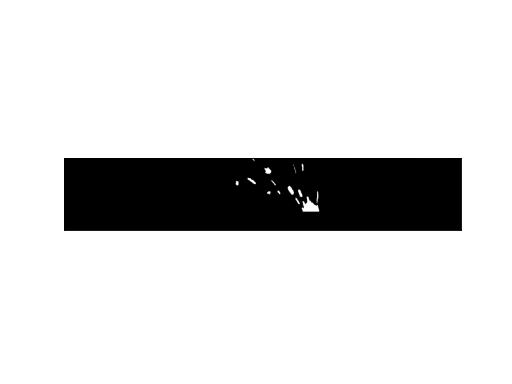

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [77]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(binarized_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(binarized_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(binarized_images[frame_num])
    im.set_clim(autoscale(binarized_images[frame_num], pixel_min1), autoscale(binarized_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()
    fig.canvas.draw_idle()

## draw all contours

In [60]:
# all_contours_images=[]

# for i in binarized_images:

#     contours, hierarchy = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     i= cv2.drawContours(i, contours, -1, ( 255), 3)
#     all_contours_images.append(i)

<IPython.core.display.Javascript object>


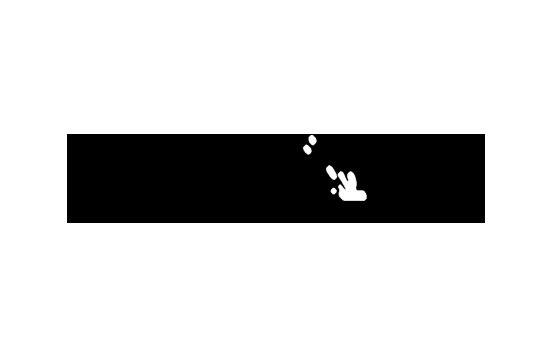

interactive(children=(IntSlider(value=69, description='frame_num', max=139), Output()), _dom_classes=('widget-…

In [61]:
# pixel_min1 = 0   
# pixel_max1 = 100
# ######################################################################################
# fig, ax = plt.subplots(dpi=100)
# im = plt.imshow(all_contours_images[0], cmap='gray')
# #fig.colorbar(im)
# # ax.set_xlabel('X (pixels)')
# plt.xticks([])
# # ax.set_ylabel('Y (pixels)')
# plt.yticks([])
# loop_num = np.arange(len(all_contours_images))
# @interact(frame_num = (loop_num[0], loop_num[-1]))
# def show(frame_num):
#     im.set_array(all_contours_images[frame_num])
#     im.set_clim(autoscale(all_contours_images[frame_num], pixel_min1), autoscale(all_contours_images[frame_num], pixel_max1))
#     fig.canvas.draw_idle()


## detect plume

In [28]:
plume_images=[]
for i in binarized_images:
    contours= cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(len(contours))
    try:
        contours = contours[0] if len(contours) == 2 else contours[1]

        mask= np.zeros(i.shape[:2], dtype="uint8")
        cnts = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        cv2.fillPoly(mask, [cnts], (255,255,255))   
        result = cv2.bitwise_and(i,i,mask=mask)

        plume_images.append(result)

    except:
        pass


<IPython.core.display.Javascript object>


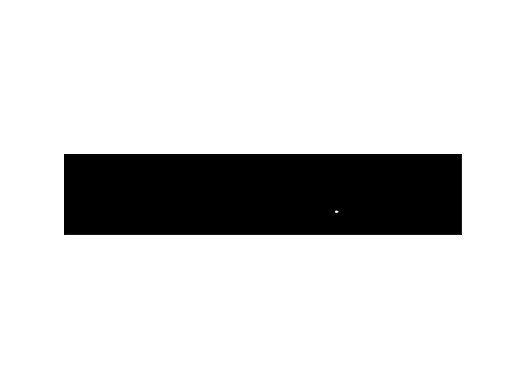

interactive(children=(IntSlider(value=29, description='frame_num', max=59), Output()), _dom_classes=('widget-i…

In [29]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(plume_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(plume_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(plume_images[frame_num])
    im.set_clim(autoscale(plume_images[frame_num], pixel_min1), autoscale(plume_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()


## remove plume

In [49]:
removed_plume_images=[]
plume_mask=[]
for i in binarized_images:
    contours = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(len(contours))
    try:
        contours = contours[0] if len(contours) == 2 else contours[1]

        mask= i
        cnts = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        cv2.fillPoly(mask, [cnts], (0,0,0))   
        result = cv2.bitwise_and(i,i,mask=mask)

        removed_plume_images.append(result)

    except:
        pass


<IPython.core.display.Javascript object>


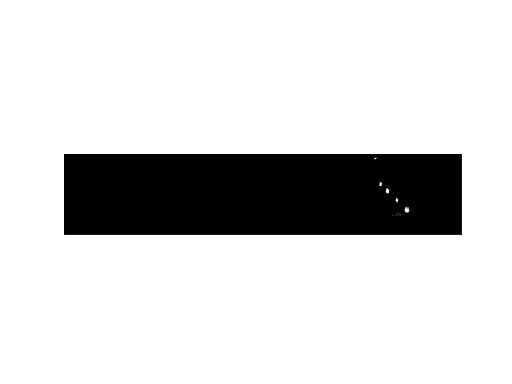

interactive(children=(IntSlider(value=29, description='frame_num', max=59), Output()), _dom_classes=('widget-i…

In [50]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(removed_plume_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(removed_plume_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(removed_plume_images[frame_num])
    im.set_clim(autoscale(removed_plume_images[frame_num], pixel_min1), autoscale(removed_plume_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()


## detect spatters outside of plume

In [78]:
plume_images=[]
plume_mask=[]
for i in binarized_images:
    contours = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    try:
        contours = contours[0] if len(contours) == 2 else contours[1]

        mask= np.ones(i.shape[:2], dtype="uint8")
        cnts = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        cv2.fillPoly(mask, [cnts], (0,0,0))   
        result = cv2.bitwise_and(i,i,mask=mask)

        plume_images.append(result)
    except:
        pass

print(len(blur_images))
print(len(plume_images))

175
175


In [79]:
blur_images = []
for jj in masked_images:
    img = cv.medianBlur(jj,7) #9#5
    blur_images.append(img)

In [80]:
masked2_images=[]
for i in range(175):   
    mask= plume_images[i]
    blur= blur_images[i]
    masked= cv2.bitwise_and(blur,blur,mask=mask)
    masked2_images.append(masked)

<IPython.core.display.Javascript object>


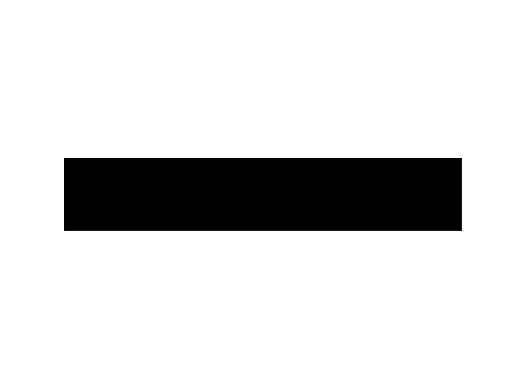

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [81]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(masked2_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(masked2_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(masked2_images[frame_num])
    im.set_clim(autoscale(masked2_images[frame_num], pixel_min1), autoscale(masked2_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()

## threshold 

In [82]:
thre_images = []
for jj in masked2_images:
    retval, thres  = cv.threshold(jj, 30,
                                   #np.percentile(jj, 98.79), 
                                   # about 225, any pixel above this value is assigned as white, below as black
                                   255,
                                   cv.THRESH_BINARY)
    
    thre_images.append(thres)

<IPython.core.display.Javascript object>


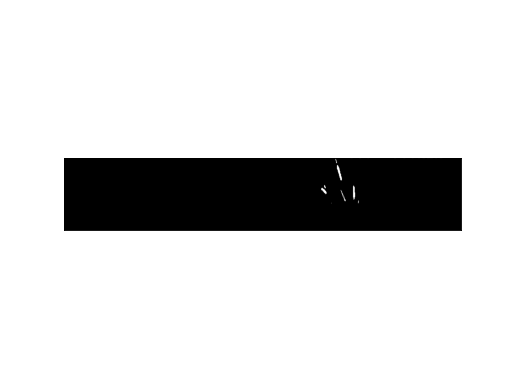

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [83]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(thre_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(thre_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(thre_images[frame_num])
    im.set_clim(autoscale(thre_images[frame_num], pixel_min1), autoscale(thre_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()

In [84]:
final_images= []
for i in thre_images:
    i = i[5:,:] 
    final_images.append(i)

<IPython.core.display.Javascript object>


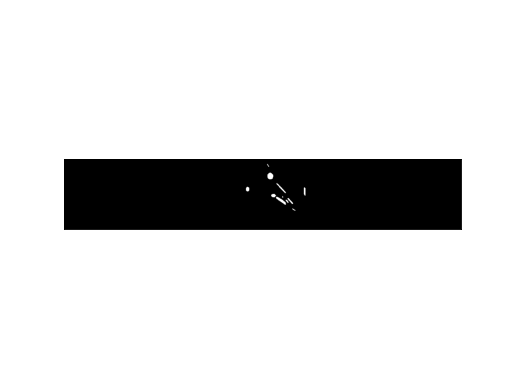

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [85]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(final_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(final_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(final_images[frame_num])
    im.set_clim(autoscale(final_images[frame_num], pixel_min1), autoscale(final_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()

## detect spatter inside the plume

In [238]:
plume_images=[]
plume_mask=[]
for i in binarized_images:
    contours = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    mask= np.zeros(i.shape[:2], dtype="uint8")
    cnts = sorted(contours, key=cv2.contourArea, reverse=True)[0]
    cv2.fillPoly(mask, [cnts], (255,255,255))   
    result = cv2.bitwise_and(i,i,mask=mask)

    plume_images.append(result)


print(len(blur_images))
print(len(plume_images))

175
175


In [253]:
blur_images = []
for jj in masked_images:
    img = cv.medianBlur(jj,7) #9#5
    blur_images.append(img)

In [254]:
masked3_images=[]
for i in range(175):   
    mask= plume_images[i]
    blur= blur_images[i]
    masked= cv2.bitwise_and(blur,blur,mask=mask)
    masked3_images.append(masked)

<IPython.core.display.Javascript object>


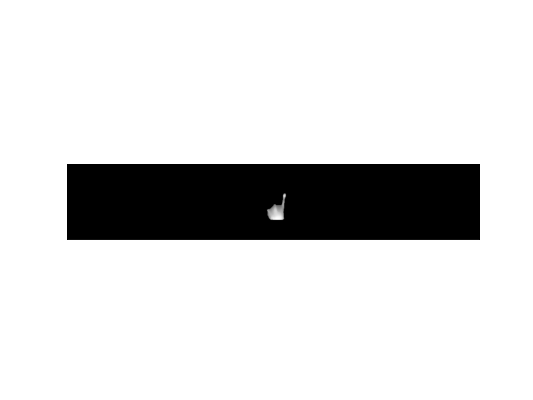

([], [])

In [284]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(masked3_images[60], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])

<IPython.core.display.Javascript object>


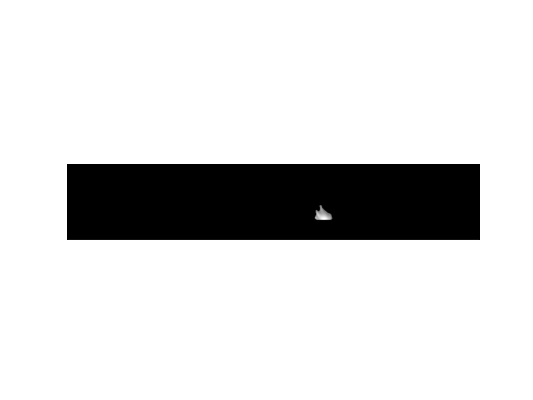

interactive(children=(IntSlider(value=87, description='frame_num', max=174), Output()), _dom_classes=('widget-…

In [255]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(masked3_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(masked3_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(masked3_images[frame_num])
    im.set_clim(autoscale(masked3_images[frame_num], pixel_min1), autoscale(masked3_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()

In [286]:
thre2_images = []
for jj in masked3_images:
    retval, thres  = cv.threshold(jj, 200,
                                   #np.percentile(jj, 98.79), 
                                   # about 225, any pixel above this value is assigned as white, below as black
                                   255,
                                   cv.THRESH_BINARY)
    thre2_images.append(thres)

NameError: name 'thre2_images' is not defined

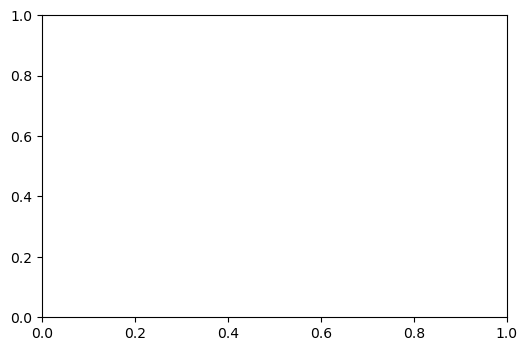

In [108]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(thre2_images[0], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])
loop_num = np.arange(len(thre2_images))
@interact(frame_num = (loop_num[0], loop_num[-1]))
def show(frame_num):
    im.set_array(thre2_images[frame_num])
    im.set_clim(autoscale(thre2_images[frame_num], pixel_min1), autoscale(thre2_images[frame_num], pixel_max1))
    fig.canvas.draw_idle()

NameError: name 'thre2_images' is not defined

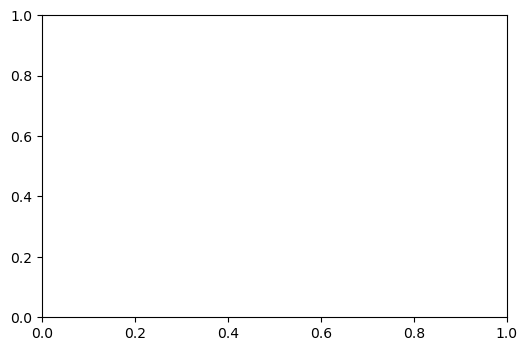

In [62]:
pixel_min1 = 0   
pixel_max1 = 100
######################################################################################
fig, ax = plt.subplots(dpi=100)
im = plt.imshow(thre2_images[20], cmap='gray')
#fig.colorbar(im)
# ax.set_xlabel('X (pixels)')
plt.xticks([])
# ax.set_ylabel('Y (pixels)')
plt.yticks([])

In [86]:
print(final_images[10].shape) #y first then x
print(len(thre_images))

(170, 960)
175


## convert frames to video

In [87]:
out= cv2.VideoWriter("cleaned1_160_500_20.mp4", cv2.VideoWriter_fourcc(*"MP4V"), 10, (960,170), isColor=False )
for i in range(len(final_images)):
    out.write(final_images[i])
out.release()



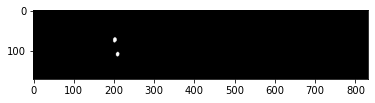

size (832, 170)
done
[3.2046908742758786, 3.8464874657302928, 2.645101097429193, 3.411431528893233, 3.943368663427267, 2.675860068533875, 3.395196638798247, 2.8868079273516734, 2.981903739197951, 2.1606320402221995, 2.0165899042073865, 2.8174293505569747, 2.844218516707418, 2.8796193018702283, 2.7280603912454793, 2.591690975532411, 2.692278294053817, 1.0607650780796165, 0.7924738645806937, 0.9409837868887836, 0.8656494248906915, 0.7631229807073348, 0.9061325355225325, 0.8335883350799251, 0.4509298850065933, 0.6314216644818108, 0.5706971254382569, 0.5035150544547755, 0.5638651530078576, 0.5263101094591374, 0.4146828240475441, 0.39534684023188055, 0.49106089951136045, 1.366912857574868, 1.3397334093627706, 1.4320372564172907, 1.407119593004644, 1.493532325140004, 1.4705136558968082, 1.5151932380605246, 1.494486202978506, 1.4719020026873668, 1.4517865971791202, 1.2801929435016686, 1.2491922792924584, 1.2063933640277007, 1.2798357041679598, 1.0936513388079747, 1.062456963716106, 1.27314286

In [14]:
%matplotlib inline
vid='cleaned2_160_750_20.mp4'

def distance(x1,x2,y1,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def findangle(a,b,c,d):
    movementvec = np.array([a-c,b-d])
    hori = np.array([0,-1])
    mag = np.linalg.norm(movementvec)
    if(mag == 0):
        return 0
    movementvec /= mag
    theta = np.arccos(np.dot(movementvec,hori)) * 180 / np.pi
    return 90 - np.sign(a-c) * theta
    

convertion = 20/960 #um/pixel
frameconvert = 9800*2 #fps 



cap = cv2.VideoCapture(vid)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 150,
                       qualityLevel = 0.7,
                       minDistance = 1,
                       blockSize = 2 )

spatter_velocity=[]
spatter_angle=[]
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))



for i in range(3):
    cap.read()
    
    
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
#print(p0)

plt.imshow(old_frame)
plt.show()

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

if (cap.isOpened()== False):  
    print("Error opening video  file") 
    
fps = 10
size = (int(cap.get(3)) , int(cap.get(4))) 
print('size', size)

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
out = cv2.VideoWriter('bbb.avi', fourcc , float(fps), size)

j=1
while(1):
    ret,frame = cap.read()
    
        
    try:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    except:
        break
        
    if j % 5 == 1:
        p0temp = cv2.goodFeaturesToTrack(frame_gray, mask = None, **feature_params)
        mask = np.zeros_like(old_frame)
        if p0temp is not None:
            p0 = p0temp
        #print(p0)
    #print(j) 
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    #print('p1', p1)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        
        
        a,b = new.ravel()
        c,d = old.ravel()
        if(j == 1):
            c0 = c
            d0 = d
          
            
        dis = distance(a,c0,b,d0) * convertion 
        speed = dis/j * frameconvert *1e-3
        angle = findangle(a,b,c0,d0)
        
        spatter_velocity.append(speed)
        spatter_angle.append(angle)
        text = "V=" + str(round(speed,4)) + "Theta =" + str(round(angle,4))
        #cv2.putText(mask, text, (int(a), int(b)),cv2.FONT_HERSHEY_SIMPLEX, 0.2 ,(255,255,255))
        mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
        img = cv2.add(mask,frame)
        
    j+= 1 
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    out.write(img)
print("done")
cv2.destroyAllWindows()
cap.release()


print(spatter_velocity)
print(spatter_angle)



In [12]:
import scipy
from scipy.stats import norm 

mean, std = scipy.stats.distributions.norm.fit(spatter_velocity)
print(mean, std)

1.6402152932368215 0.8066135079918225


In [13]:
import scipy
from scipy.stats import norm 

mean, std = scipy.stats.distributions.norm.fit(spatter_angle)
print(mean, std)

53.24520881661409 58.865820983313924
